# Data Wrangling Project Group 52

## Research Question
How have the prevalence and popularity of different movie genres evolved over time in the film industry?

### 1) Importing libraries

In [1]:
# LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import itertools

# MODULES
from pandas import DataFrame, Series # type hints
from scipy.stats import chi2_contingency 
from scipy.sparse import dok_matrix
from datetime import datetime

In [2]:
# Extra

sns.set_theme()

### 2) Getting the dataset

In [3]:
# Importing the dataset

path: str = "movies_metadata.csv"
df: DataFrame = pd.read_csv(path)

C:\Users\no\AppData\Local\Temp\ipykernel_13716\3465086075.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df: DataFrame = pd.read_csv(path)


### 3) Understanding the dataset

In [4]:
df.shape

(45466, 24)

In [5]:
# A quick sample of the dataset

df.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [6]:
# How do genres look like?

df["genres"].value_counts()

[{'id': 18, 'name': 'Drama'}]                                                                                                         5000
[{'id': 35, 'name': 'Comedy'}]                                                                                                        3621
[{'id': 99, 'name': 'Documentary'}]                                                                                                   2723
[]                                                                                                                                    2442
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                       1301
                                                                                                                                      ... 
[{'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}, {'id': 99, 'name': 'Documentary'}]             1
[{'id': 10752, 'name': 'War

In [7]:
# Are all movies released?

df["status"].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [8]:
# Are there any duplicates?

print(len(df) - len(df.drop_duplicates(subset=["id"])))


30


In [9]:
# Are there missing values?
# Note: some columns are allowed to have NaN because they are optional or irrelevant to 
# our question

subset = list(df.columns.values)
for i in ["belongs_to_collection", "homepage", "tagline"]:
    subset.remove(i)
rows_normal: int = len(list(df.iterrows()))
rows_cleaned: int = len(list(df.dropna(subset=subset).iterrows()))
num_missing: int = rows_normal - rows_cleaned
num_missing

1418

### 4) Extracting relevant data for all questions

In [10]:
# Firstly, let's remove NaN values in important columns

df = df.dropna(subset=subset)

In [11]:
# Secondly, remove the duplicate movie entries

df = df.drop_duplicates(subset=["id"])

In [12]:
# Then, only released movies are relevant to this analysis, so the rest will be removed.

df = df[df["status"] == "Released"]

In [13]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [14]:
# Genres should only be a list of genre names

df = df.astype({'genres': 'str'})
def genre(genres: str) -> list[str]:
    """
    This method converts a JSON-formatted genre string into a list of strings.
    """
    try:
        genres_json: list[dict[str, any]] = json.loads(genres.replace("'", '"'))
        return [genre["name"] for genre in genres_json]
    except:
        return []
df["genres"] = df["genres"].apply(genre)

In [15]:
df["genres"].value_counts()

[Drama]                                                          4832
[Comedy]                                                         3321
[Documentary]                                                    2571
[]                                                               1945
[Drama, Romance]                                                 1280
                                                                 ... 
[Music, Drama, TV Movie]                                            1
[Adventure, Fantasy, Drama, Science Fiction, Romance, Family]       1
[TV Movie, Drama, Horror, Romance]                                  1
[Action, Adventure, Animation, Science Fiction, Thriller]           1
[Family, Animation, Romance, Comedy]                                1
Name: genres, Length: 4021, dtype: int64

### 5) Research Subquestions

For each subquestion:
- Data wrangling necessary only per subquestion
- Some data exploration / understanding
- Data Visualization

#### RQ1

What does the distribution of movie genres look like in general, and how did it change over time? Which genres were more prevalent in the movie industry in each decade?

**More data cleaning & extraction**

In [16]:
# Copy of the dataframe, s.t. we perform the RQ1 changes only here
# Only of the relevant columns

df1: DataFrame = df[["title", "release_date", "genres"]]

In [17]:
# Transforming the release date into a decade

def decade(date: str) -> str:
    try:
        return date[0:3] + "0s"
    except:
        return None
df1["release_date"] = df1["release_date"].apply(decade)
df1 = df1.rename(columns = {"release_date": "decade"})

C:\Users\no\AppData\Local\Temp\ipykernel_13716\3488814973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["release_date"] = df1["release_date"].apply(decade)


**Some final exploration**

In [18]:
# How does the dataset look like?

df1.head()

,title,decade,genres
0,Toy Story,1990s,"[Animation, Comedy, Family]"
1,Jumanji,1990s,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,1990s,"[Romance, Comedy]"
3,Waiting to Exhale,1990s,"[Comedy, Drama, Romance]"
4,Father of the Bride Part II,1990s,[Comedy]


In [19]:
# Distribution of decades

df1["decade"].value_counts()

2010s    12261
2000s    10752
1990s     5445
1980s     3803
1970s     3352
1960s     2540
1950s     2015
1940s     1469
1930s     1297
1920s      423
1910s      172
1900s       77
1890s       68
1880s        4
1870s        2
Name: decade, dtype: int64

**Data Visualization for the Analysis**

*Chart No. 1: Pie Chart - The General Distribution of Genres over the Movie Dataset*

{'Drama': 19771, 'Comedy': 12669, 'Thriller': 7518, 'Romance': 6593, 'Action': 6505, 'Horror': 4618, 'Crime': 4237, 'Documentary': 3749, 'Adventure': 3438, 'Science Fiction': 2986, 'Family': 2698, 'Mystery': 2430, 'Fantasy': 2264, 'Animation': 1886, 'Music': 1570, 'Foreign': 1559, 'History': 1370, 'War': 1303, 'Western': 1028, 'TV Movie': 735}


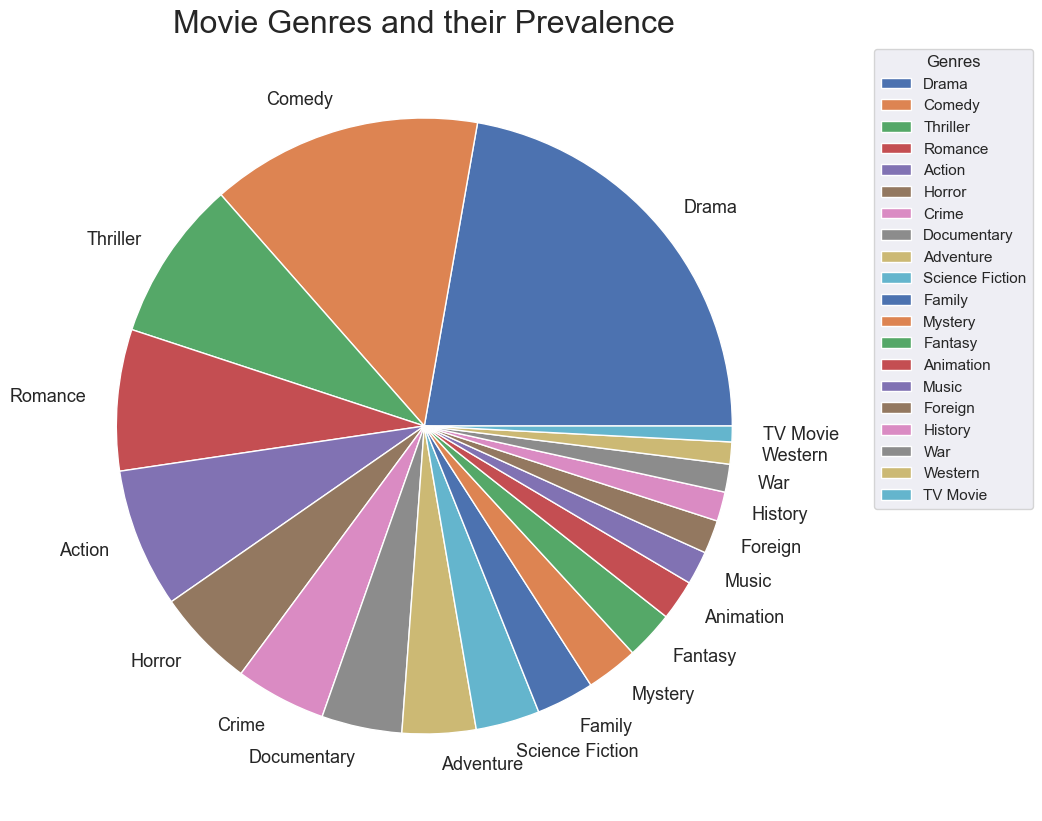

In [20]:
# Distribution of genres
distribution: dict[str, int] = dict()
for index, entry in df1.iterrows():
    for genre in entry["genres"]:
        if genre not in distribution:
            distribution[genre] = 1
        else:
            distribution[genre] += 1

# Sorting for nicety
distribution = dict(sorted(distribution.items(), key=lambda x:x[1], reverse=True))
print(distribution)

# Arrays to be plotted
genres: list[str] = list(distribution.keys())
nr_movies: list[int] = list(distribution.values())

# The Pie Chart
plt.figure(figsize=(10,10))
plt.pie(nr_movies, labels=genres, textprops={'fontsize':13})
plt.legend(title="Genres", bbox_to_anchor=(0.8, 0, 0.5, 1))
plt.title("Movie Genres and their Prevalence", fontsize=23)
plt.show()

*Chart No. 2: Stacked Bar Chart - The Evolution of Top 3 Most Common Movie Genres Per Decade (since the 1950s)*

{'1950s': {'Drama': 1049, 'Comedy': 430, 'Romance': 394}, '1960s': {'Drama': 1187, 'Comedy': 698, 'Romance': 371}, '1970s': {'Drama': 1471, 'Comedy': 807, 'Action': 641}, '1980s': {'Drama': 1523, 'Comedy': 1247, 'Action': 709}, '1990s': {'Drama': 2548, 'Comedy': 1794, 'Thriller': 1035}, '2000s': {'Drama': 5134, 'Comedy': 3275, 'Thriller': 2137}, '2010s': {'Drama': 5036, 'Comedy': 3345, 'Thriller': 2326}}
{'Drama': [1049, 1187, 1471, 1523, 2548, 5134, 5036], 'Comedy': [430, 698, 807, 1247, 1794, 3275, 3345], 'Romance': [394, 371, 0, 0, 0, 0, 0], 'Action': [0, 0, 641, 709, 0, 0, 0], 'Thriller': [0, 0, 0, 0, 1035, 2137, 2326]}


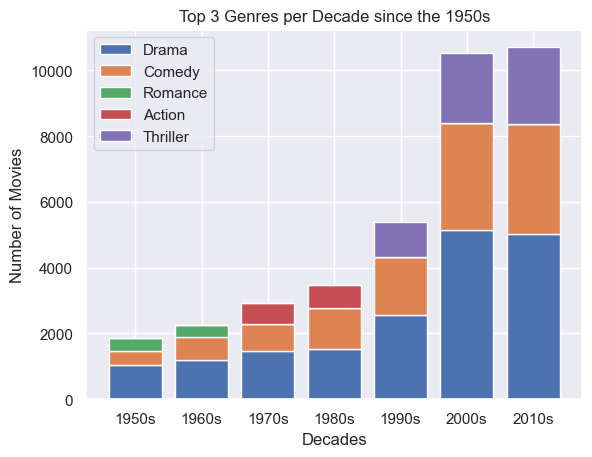

In [21]:
# Distribution of genres per decade
decade_distribution: dict[str, dict[str, int]] = dict()
for index, entry in df1.iterrows():
    decade = entry[1]
    genres = entry[2]
    if decade is not None:
        if decade not in decade_distribution:
            decade_distribution[decade] = dict()
        else:
            for g in genres:
                if g not in decade_distribution[decade]:
                    decade_distribution[decade][g] = 1
                else:
                    decade_distribution[decade][g] += 1

# Sorting by decades & extracting the top 3 genres for each genre
decade_distribution = dict(sorted(decade_distribution.items()))
for decade in decade_distribution:
    decade_distribution[decade] = dict(sorted(decade_distribution[decade].items(), key=lambda x:x[1], reverse=True))
    if len(list(decade_distribution[decade].keys())) >= 3:
        decade_distribution[decade] = dict(itertools.islice(decade_distribution[decade].items(), 3))

# Filtering the decade distribution to only have movies from the 50s:
decade_distribution = {key: value for key, value in decade_distribution.items() if int(key[0:3]) >= 195}
print(decade_distribution)

# A dicttionary that works for stacked barchart due to a better format
# Note: {genre: [list of nr of movies of this genre for each decade]}
column_groups: list[str] = list(decade_distribution.keys())
filtered_genre_counts_top_3: dict[str, list[int]] = dict()
for decade, genres in decade_distribution.items():
    for genre, count in genres.items():
        if genre not in filtered_genre_counts_top_3:
            filtered_genre_counts_top_3[genre] = [0] * len(column_groups)
        genre_index = column_groups.index(decade)
        filtered_genre_counts_top_3[genre][genre_index] = count
print(filtered_genre_counts_top_3)

# The Stacked Barchart

x = np.arange(len(column_groups))  
bottoms = np.zeros(len(column_groups))
width = 0.8
for genre, values in filtered_genre_counts_top_3.items():
    plt.bar(x, values, width, label=genre, bottom=bottoms)
    bottoms += values
plt.xlabel("Decades")
plt.ylabel("Number of Movies")
plt.title("Top 3 Genres per Decade since the 1950s")
plt.xticks(x, column_groups)
plt.legend()
plt.show()

*Chart No. 3: Histogram - The Most Common Number of Genres Per Movie*

{'Yu-Gi-Oh! The Movie': 8, 'Princes and Princesses': 8, 'Cool Cat Saves the Kids': 8, 'Young Sherlock Holmes': 7, 'Westworld': 7, 'Against All Odds': 7, 'Tuvalu': 7, 'Jimmy Neutron: Boy Genius': 7, 'Vampire Hunter D: Bloodlust': 7, 'Jonah: A VeggieTales Movie': 7, 'The Advocate': 7, 'Lucía, Lucía': 7, 'Holiday': 7, 'Origin: Spirits of the Past': 7, 'The Librarian: Quest for the Spear': 7, 'Moon Warriors': 7, 'MVP: Most Valuable Primate': 7, 'Malice in Wonderland': 7, 'Raffles': 7, 'One of Our Dinosaurs Is Missing': 7, 'Negative Happy Chain Saw Edge': 7, 'Fishtales': 7, 'Hellboy Animated: Blood and Iron': 7, 'Black Butler': 7, 'Vampires in Havana': 7, 'Congo': 6, 'Radioland Murders': 6, 'The 39 Steps': 6, 'Beat the Devil': 6, 'Bedknobs and Broomsticks': 6, "The Preacher's Wife": 6, 'Thieves': 6, 'First Strike': 6, 'Turbo: A Power Rangers Movie': 6, 'Spawn': 6, 'A Life Less Ordinary': 6, 'Senseless': 6, 'The Proposition': 6, 'Doctor Dolittle': 6, 'The Negotiator': 6, 'The Presidio': 6, '

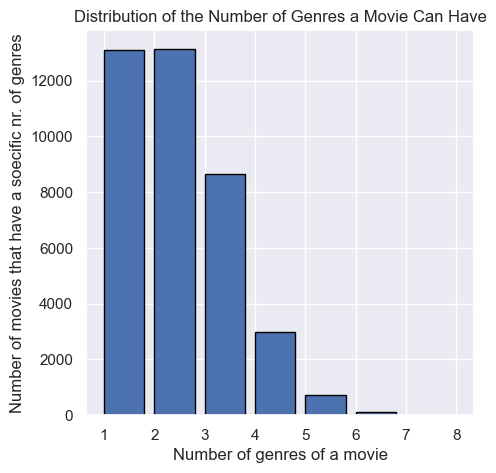

In [22]:
# Distribution of number of genres per movie
movie_distribution: dict[str, int] = dict()
for index, entry in df1.iterrows():
    mov = entry[0]
    gen = entry[2]
    movie_distribution[mov] = len(gen)
movie_distribution = dict(sorted(movie_distribution.items(), key=lambda x:x[1], reverse=True))
print(movie_distribution)

# Possible number of genres and how many movies have each nr of genres
possible_nrs: dict[int, int] = dict()
for value in movie_distribution.values():
    if value not in possible_nrs:
        possible_nrs[value] = 1
    else:
        possible_nrs[value] += 1
possible_nrs = dict(sorted(possible_nrs.items(), reverse=True))
possible_nrs.popitem()
print(possible_nrs)

# The Histogram
data = [key for key, val in possible_nrs.items() for _ in range(val)]
plt.figure(figsize=(5,5))
plt.title("Distribution of the Number of Genres a Movie Can Have")
plt.hist(data, bins=[1,2,3,4,5,6,7,8], edgecolor='black', width=0.8)
plt.xlabel("Number of genres of a movie")
plt.ylabel("Number of movies that have a soecific nr. of genres")
plt.show()

#### RQ2

How have audience and critic ratings for specific movie genres (such as action, drama, comedy) evolved over the decades? Are certain genres experiencing an increase or decrease in popularity?

**More data cleaning & extraction**

In [23]:
# Copy of the dataframe, s.t. we perform the RQ2 changes only here
# And first minimal changes

df2: DataFrame = df
df2['id'] = pd.to_numeric(df2['id'], errors='coerce')

In [24]:
# A different method of extracting the decade than in RQ1

def extract_decade(release_date: str) -> int:
    try:
        year = datetime.strptime(release_date, '%Y-%m-%d').year
        return (year // 10) * 10
    except:
        return None
df2['decade'] = df2['release_date'].apply(extract_decade)
genre_decade_df = df2.explode('genres').groupby(['decade', 'genres']).size().reset_index(name='count')
avg_rating_genre_decade_df = df2.explode('genres').groupby(['decade', 'genres'])['vote_average'].mean().reset_index()

**Charts for Data Exploration**

*Chart No. 1: Line Plot - Genre Trends Over Decades*

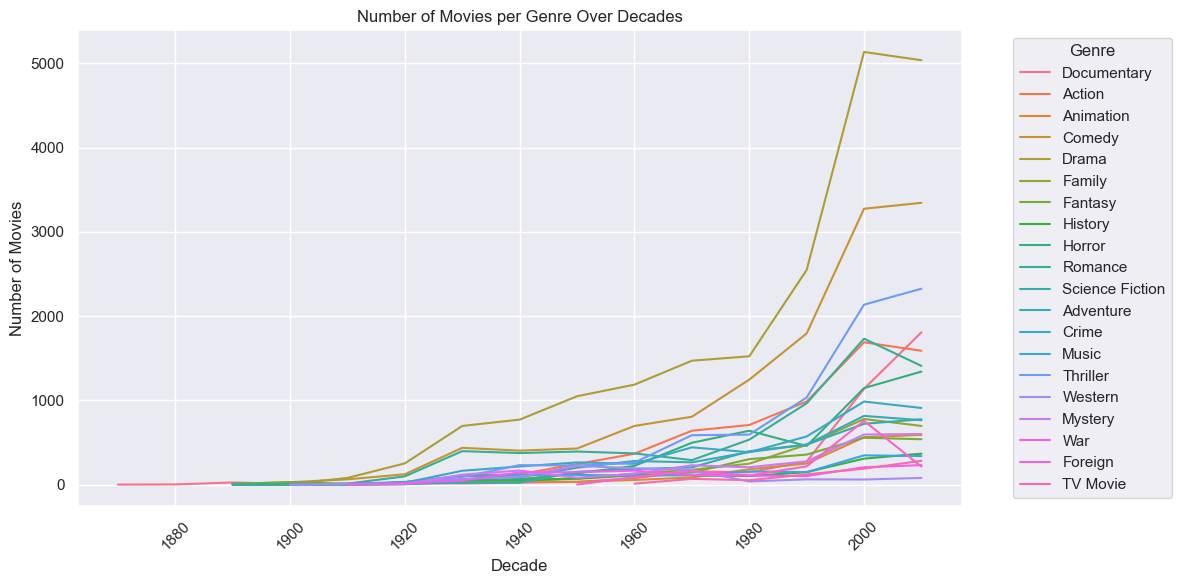

In [25]:
# Genre Trends Over Decades

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_decade_df, x='decade', y='count', hue='genres')
plt.title('Number of Movies per Genre Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

*Chart No. 2: Line Plot - Average Audience Ratings by Genre and Decade*

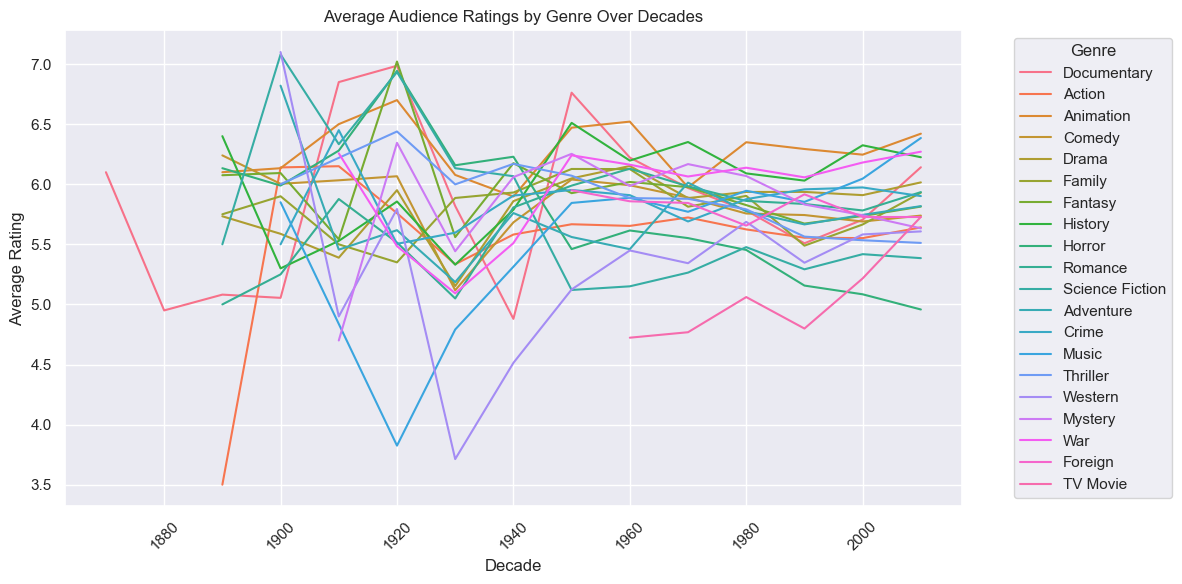

In [26]:
# Average Audience Ratings by Genre and Decade
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_rating_genre_decade_df, x='decade', y='vote_average', hue='genres')
plt.title('Average Audience Ratings by Genre Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plots
plt.show()

*Chart No. 3: Histogram - Distribution of Movie Runtimes*

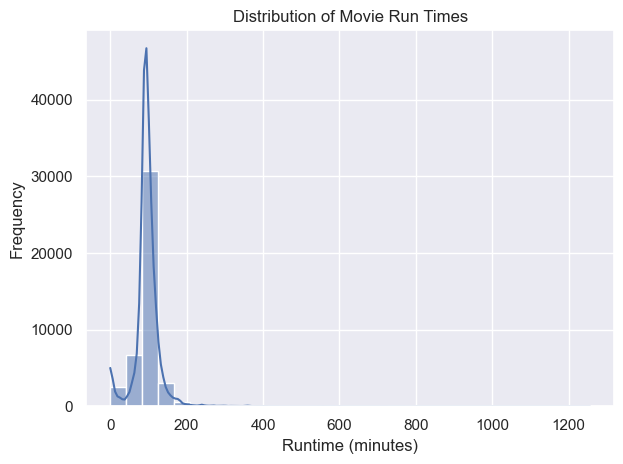

In [27]:
sns.histplot(df2['runtime'], bins=30, kde=True)
plt.title('Distribution of Movie Run Times')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()

*Chart No. 4: Bar Plot - Top Genres by Average Rating*

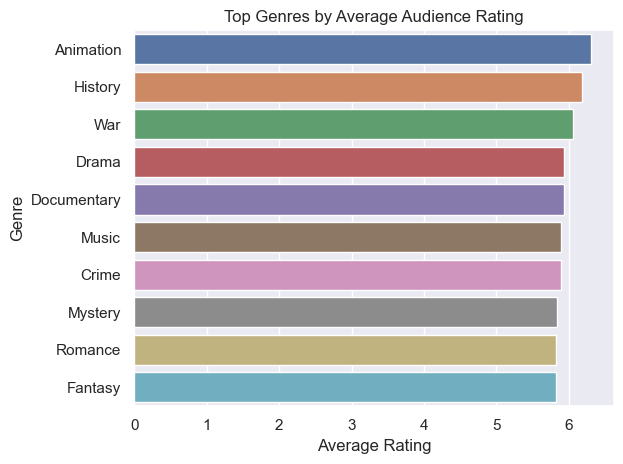

In [28]:
# Top Genres by Average Rating

top_genres_avg_rating = df2.explode('genres').groupby('genres')['vote_average'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres_avg_rating.values, y=top_genres_avg_rating.index)
plt.title('Top Genres by Average Audience Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()

*Chart No. 5: Line Plot - Movie Release Counts by Year*

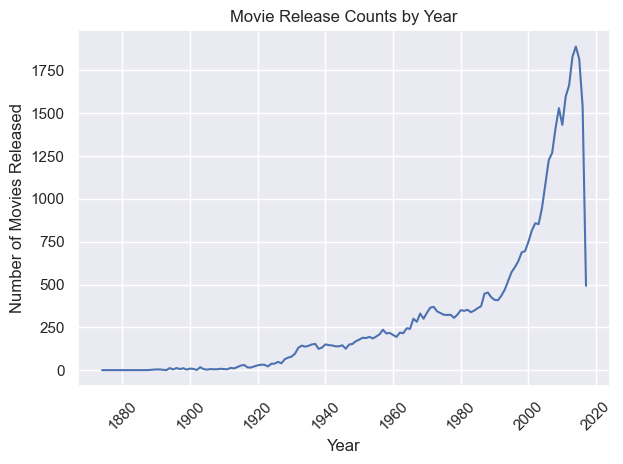

In [29]:
# Movie Release Counts by Year

df2['year'] = pd.to_datetime(df2['release_date'], errors='coerce').dt.year
yearly_movie_counts = df2.groupby('year').size().reset_index(name='count')
sns.lineplot(data=yearly_movie_counts, x='year', y='count')
plt.title('Movie Release Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.tight_layout()

*Chart No. 6: Heatmap - Popularity of Genres Over Time*

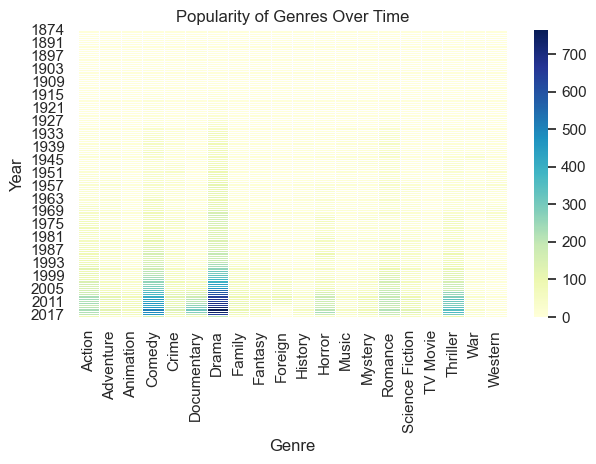

In [30]:
genre_year_df = df2.explode('genres').groupby(['year', 'genres']).size().reset_index(name='count')
genre_year_pivot = genre_year_df.pivot(index="year", columns="genres", values="count").fillna(0)
sns.heatmap(genre_year_pivot, cmap="YlGnBu", linewidths=.5)
plt.title('Popularity of Genres Over Time')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.tight_layout()

**Introducing the second dataset**

In [31]:
# The second dataset (ratings.csv)
ratings_df: DataFrame = pd.read_csv('ratings.csv')

# Display the number of rows and columns
print("Number of rows:", ratings_df.shape[0])
print("Number of columns:", ratings_df.shape[1])

# Display the data types of the entries
print("\nData Types of the Entries:")
print(ratings_df.dtypes)
missing_values = ratings_df.isna().sum()
print("Missing values in each column:")
print(missing_values)
duplicate_rows = ratings_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of rows: 26024289
Number of columns: 4

Data Types of the Entries:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
Missing values in each column:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Number of duplicate rows: 0


In [32]:
# Merging df2 and ratings_df

merged_df: DataFrame = pd.merge(ratings_df, df2, left_on='movieId', right_on='id')

**Data Visualization for the Analysis**

*Chart No. 1: Line Plot - Yearly Average Ratings Per Genre*

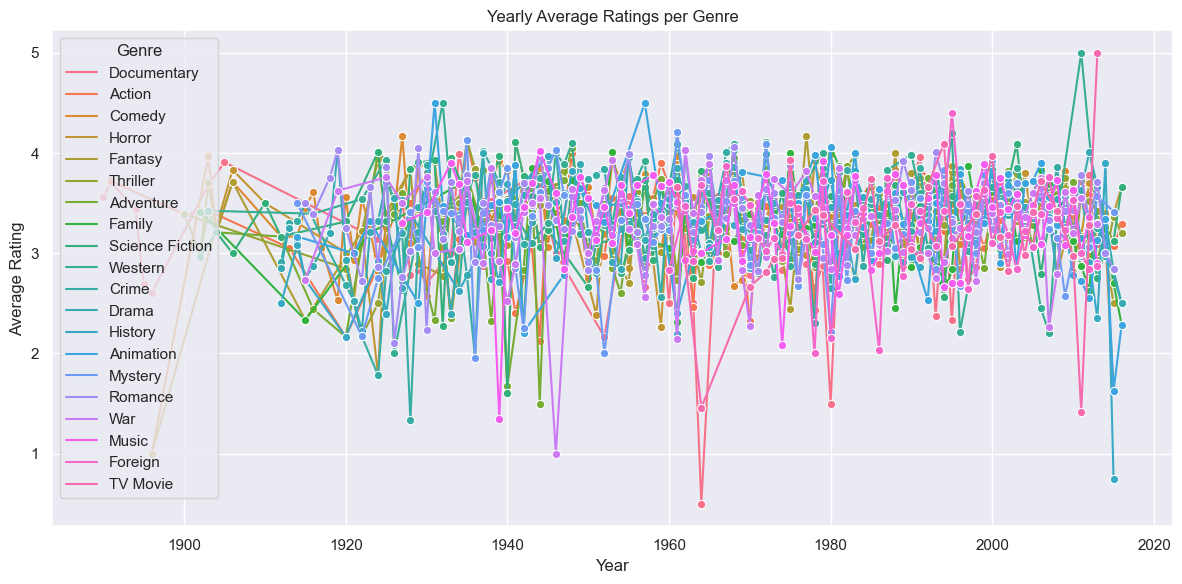

In [33]:
merged_df['year'] = pd.to_datetime(merged_df['release_date']).dt.year

# Explode the 'genre_list' to have one genre per row
merged_df = merged_df.explode('genres')

# Group by year and genre and calculate average rating
yearly_ratings = merged_df.groupby(['year', 'genres'])['rating'].mean().reset_index()

# Create the graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_ratings, x='year', y='rating', hue='genres', marker='o')
plt.title('Yearly Average Ratings per Genre')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre')
plt.tight_layout()

# Display the plot
plt.show()

*Chart No. 2: Line Plot - Yearly Average Ratings Per Genre -> for a small subset of genres*

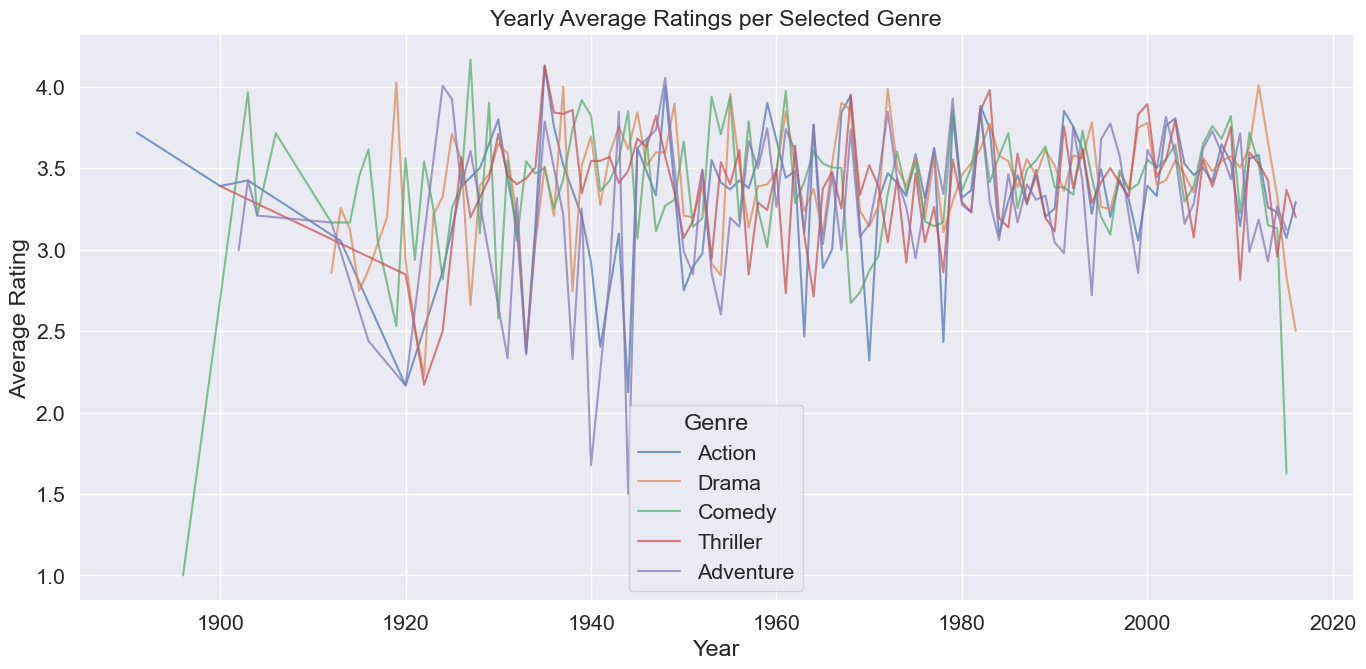

In [34]:
focused_genres = ['Action', 'Drama', 'Comedy', 'Thriller', 'Adventure']
yearly_ratings_focused = yearly_ratings[yearly_ratings['genres'].isin(focused_genres)]

# Use a rolling mean to smooth lines (optional)
# yearly_ratings_focused['rating'] = yearly_ratings_focused.groupby('genre_list')['rating'].rolling(window=5).mean().reset_index(0, drop=True)

plt.figure(figsize=(14, 7))
sns.set(font_scale=1.4)

# Plot each genre with different styles and increased transparency
for genre in focused_genres:
    genre_data = yearly_ratings_focused[yearly_ratings_focused['genres'] == genre]
    sns.lineplot(data=genre_data, x='year', y='rating', label=genre, alpha=0.7)

plt.title('Yearly Average Ratings per Selected Genre')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre')
plt.tight_layout()

# Display the improved plot
plt.show()

*Chart No. 3: Boxplot - Distribution of Ratings Across Genres*

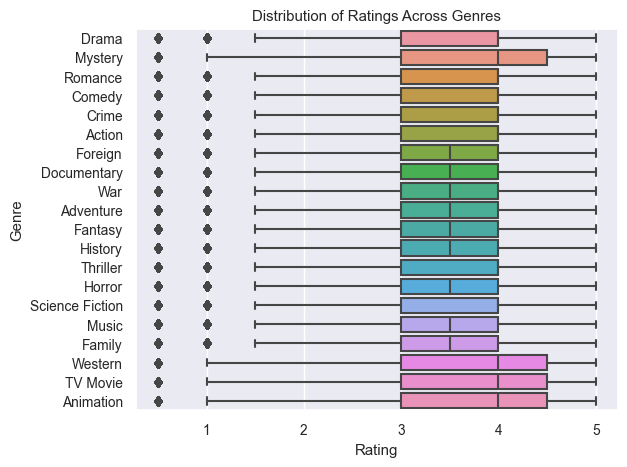

In [47]:
sns.boxplot(x='rating', y='genres', data=merged_df.explode('genres'))
#sns.set(font_scale=0.9)
plt.title('Distribution of Ratings Across Genres')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.tight_layout()

*Chart No. 4: Bar Plot - Average ratings per genre*

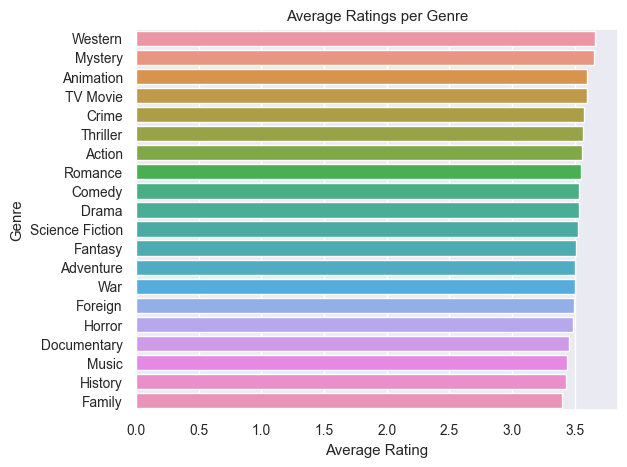

In [52]:
avg_ratings_genre = merged_df.explode('genres').groupby('genres')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_ratings_genre.values, y=avg_ratings_genre.index)
plt.title('Average Ratings per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()

*Chart No. 5: Bar Plot - Number of Ratings per Genre*

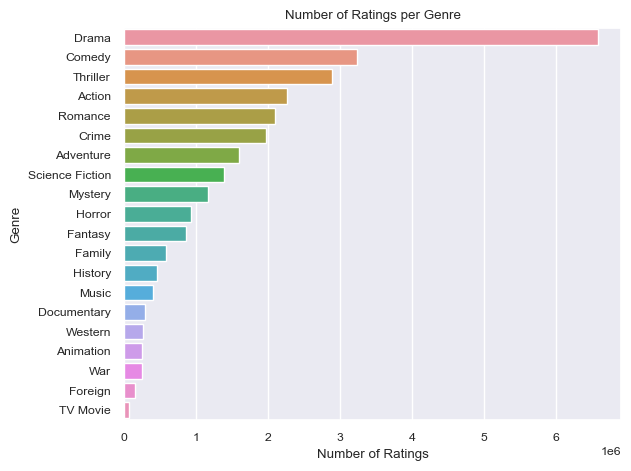

In [37]:
ratings_count_genre = merged_df.explode('genres').groupby('genres').size().sort_values(ascending=False)
sns.barplot(x=ratings_count_genre.values, y=ratings_count_genre.index)
plt.title('Number of Ratings per Genre')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.tight_layout()

#### RQ3

Is there a correlation between movie genres and the revenue generated, and if so, which genres tend to exhibit a stronger correlation with higher revenues?

**More data cleaning & extraction**

In [38]:
# Copy of the dataframe, s.t. we perform the RQ3 changes only here
# Only of the relevant columns

df3: DataFrame = df[["genres", "revenue"]]

**Some data exploration**

In [39]:
print("First few rows of the dataset:")
print(df3.head())
print("\nDataset Info:")
df3.info()
print("\nDataset Description:")
print(df3.describe())

First few rows of the dataset:
                         genres      revenue
0   [Animation, Comedy, Family]  373554033.0
1  [Adventure, Fantasy, Family]  262797249.0
2             [Romance, Comedy]          0.0
3      [Comedy, Drama, Romance]   81452156.0
4                      [Comedy]   76578911.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43680 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   genres   43680 non-null  object 
 1   revenue  43680 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1023.8+ KB

Dataset Description:
            revenue
count  4.368000e+04
mean   1.165870e+07
std    6.558895e+07
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    2.787965e+09


In [40]:
expanded_data: DataFrame = df3.explode('genres')
expanded_data.head()

,genres,revenue
0,Animation,373554033.0
0,Comedy,373554033.0
0,Family,373554033.0
1,Adventure,262797249.0
1,Fantasy,262797249.0


In [41]:
genre_revenue_avg: DataFrame = expanded_data.groupby('genres')['revenue'].mean()
genre_revenue_avg_sorted: Series = genre_revenue_avg.sort_values(ascending=False)
genre_revenue_avg_sorted

genres
Adventure          5.816715e+07
Fantasy            4.590113e+07
Family             3.968746e+07
Animation          3.575449e+07
Science Fiction    3.276760e+07
Action             3.095786e+07
Thriller           1.725424e+07
Crime              1.495756e+07
Mystery            1.430231e+07
Comedy             1.316402e+07
War                1.220932e+07
Romance            1.114347e+07
History            1.087627e+07
Music              8.516110e+06
Drama              8.129993e+06
Horror             6.677587e+06
Western            4.982976e+06
Documentary        3.865330e+05
Foreign            1.849175e+05
TV Movie           5.714286e+04
Name: revenue, dtype: float64

**Data Visualization**

*Chart No. 1: Bar Chart: Average Revenue by Genre*

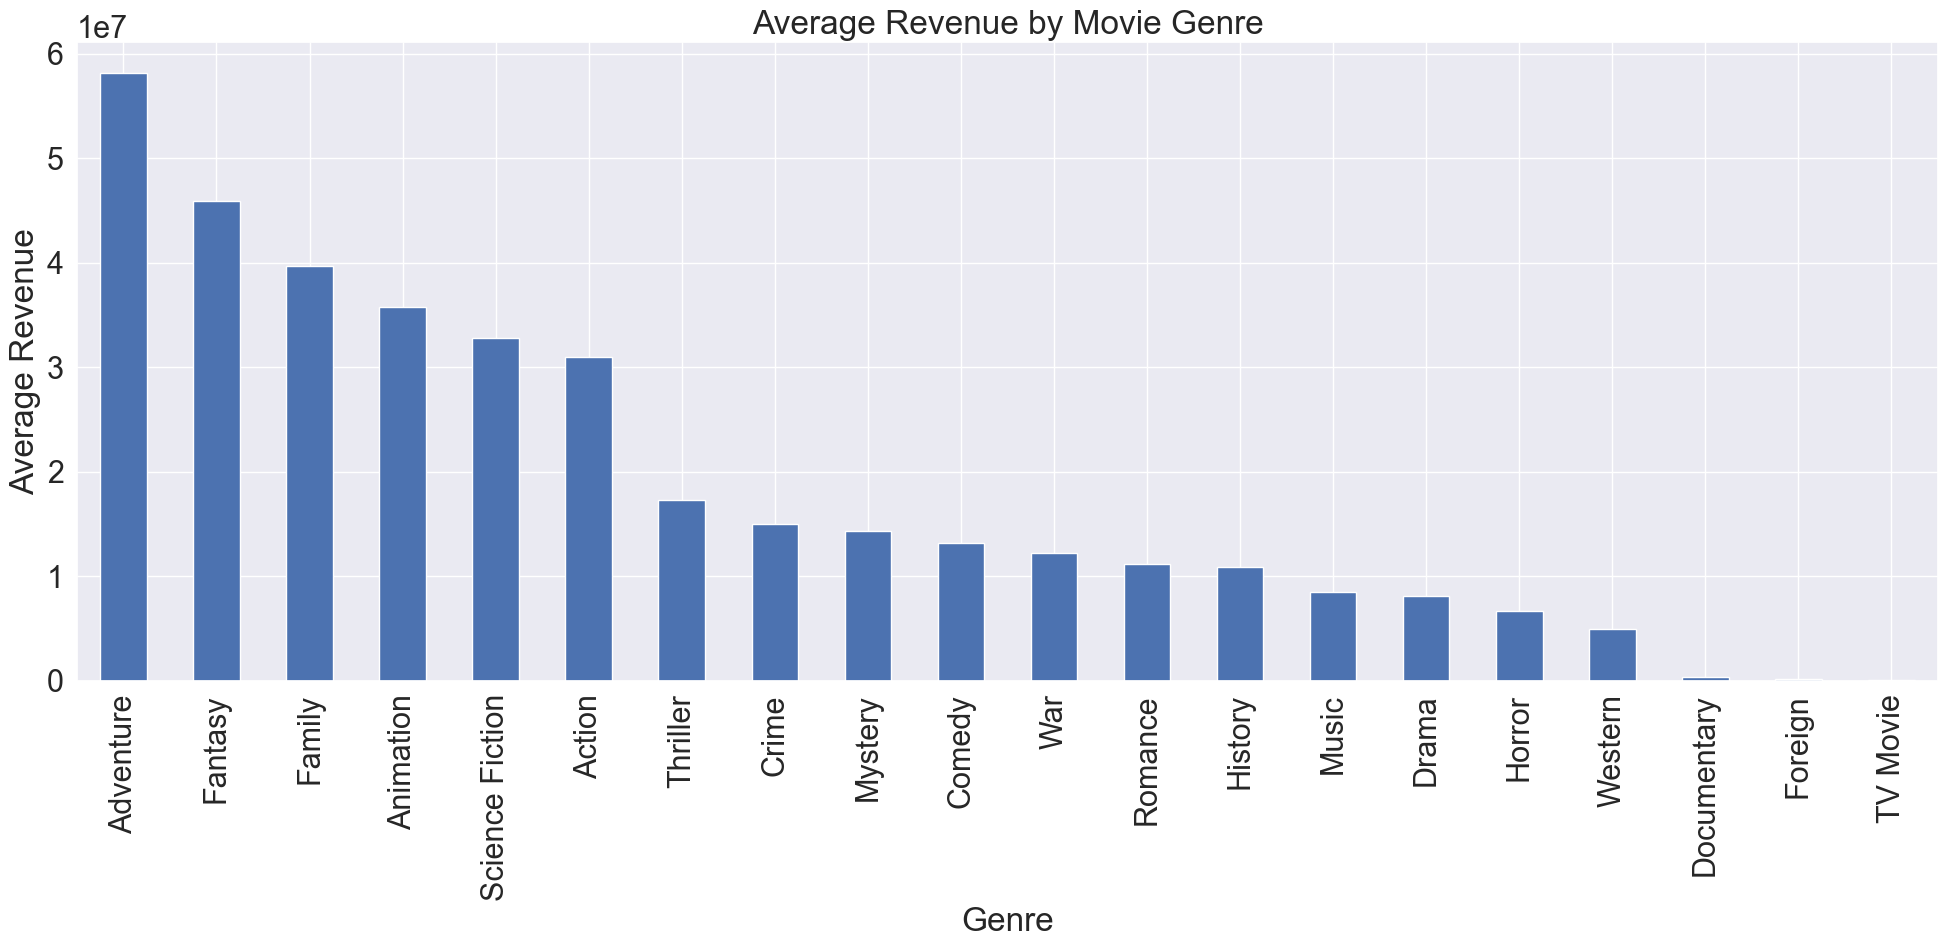

In [57]:
plt.figure(figsize=(20, 10))  
sns.set(font_scale=2)
genre_revenue_avg_sorted.plot(kind='bar')
plt.title('Average Revenue by Movie Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

*Chart No. 2: Pie Chart - Proportion of Average Revenues by Genre*

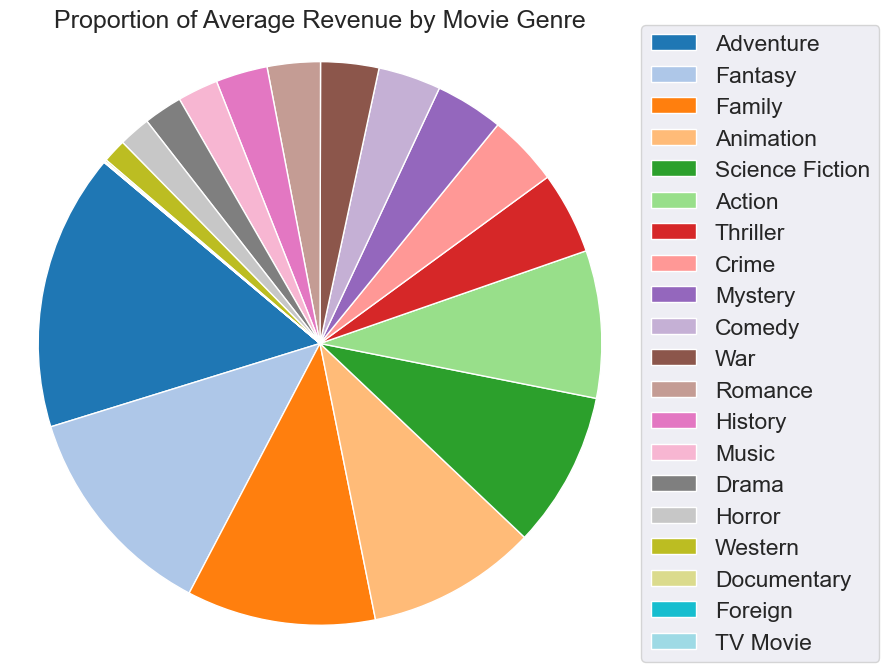

In [68]:
colors = plt.cm.tab20.colors
if len(genre_revenue_avg_sorted) > len(colors):
    colors = plt.cm.tab20b.colors + plt.cm.tab20c.colors
plt.figure(figsize=(8, 8))
pie, _ = plt.pie(genre_revenue_avg_sorted, colors=colors[:len(genre_revenue_avg_sorted)], startangle=140)
plt.axis('equal')  
plt.title('Proportion of Average Revenue by Movie Genre')
plt.legend(pie, genre_revenue_avg_sorted.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#### RQ4

Is there a correlation between a movie's genre and its likelihood of being part of a franchise? 

In [58]:
# ?

pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

**More data cleaning & extraction**

In [59]:
# Copy of the dataframe, s.t. we perform the RQ4 changes only here
# Only of the relevant columns

df4: DataFrame = df[["genres", "belongs_to_collection"]]
df4['franchise'] = df4['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1)
df4.head()

C:\Users\no\AppData\Local\Temp\ipykernel_13716\393877341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['franchise'] = df4['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1)


,genres,belongs_to_collection,franchise
0,"[Animation, Comedy, Family]","{'id': 10194, 'name': 'Toy Story Collection', ...",1
1,"[Adventure, Fantasy, Family]",NaN,0
2,"[Romance, Comedy]","{'id': 119050, 'name': 'Grumpy Old Men Collect...",1
3,"[Comedy, Drama, Romance]",NaN,0
4,[Comedy],"{'id': 96871, 'name': 'Father of the Bride Col...",1


**Some final data exploration**

**Data Visualization for the Analysis**

*Chart No. 1: Pie Chart - Distribution of Franchise Status*

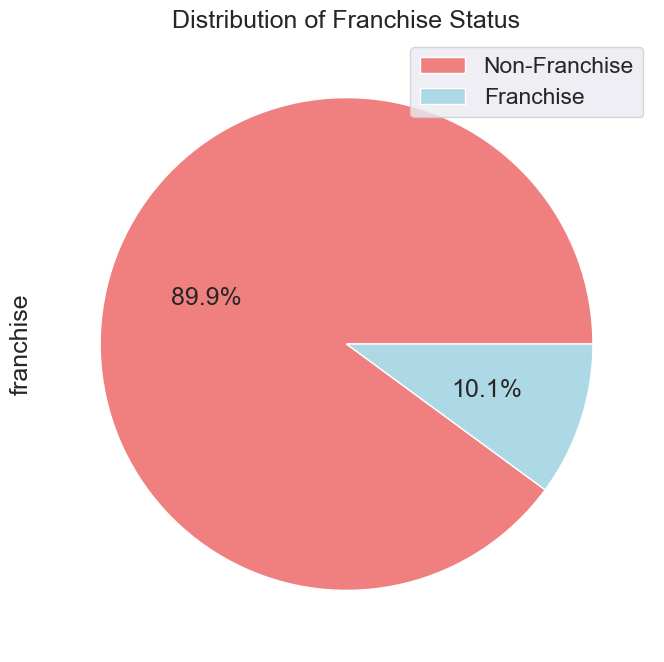

In [63]:
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.5)
franchise_counts: Series = df4['franchise'].value_counts()
franchise_counts.plot.pie(autopct='%1.1f%%', labels=None, colors=['lightcoral', 'lightblue'])

# Create a legend with custom labels
legend_labels: list[str] = ['Non-Franchise', 'Franchise']
plt.legend(legend_labels, loc='upper right')
plt.title('Distribution of Franchise Status')
plt.show()

*Chart No. 2: Distribution of Franchise Status Among Genres*

In [64]:
all_genres: list[str] = sorted(set(genre for sublist in df4['genres'] for genre in sublist))
genres_matrix = dok_matrix((len(df4), len(all_genres)), dtype=np.int8)
for idx, genres in enumerate(df4['genres']):
    for genre in genres:
        genres_matrix[idx, all_genres.index(genre)] = 1
genres_df: DataFrame = pd.DataFrame.sparse.from_spmatrix(genres_matrix, columns=all_genres)
df4 = pd.concat([df4, genres_df], axis=1)
df4 = df4.drop(['belongs_to_collection', 'genres'], axis=1)

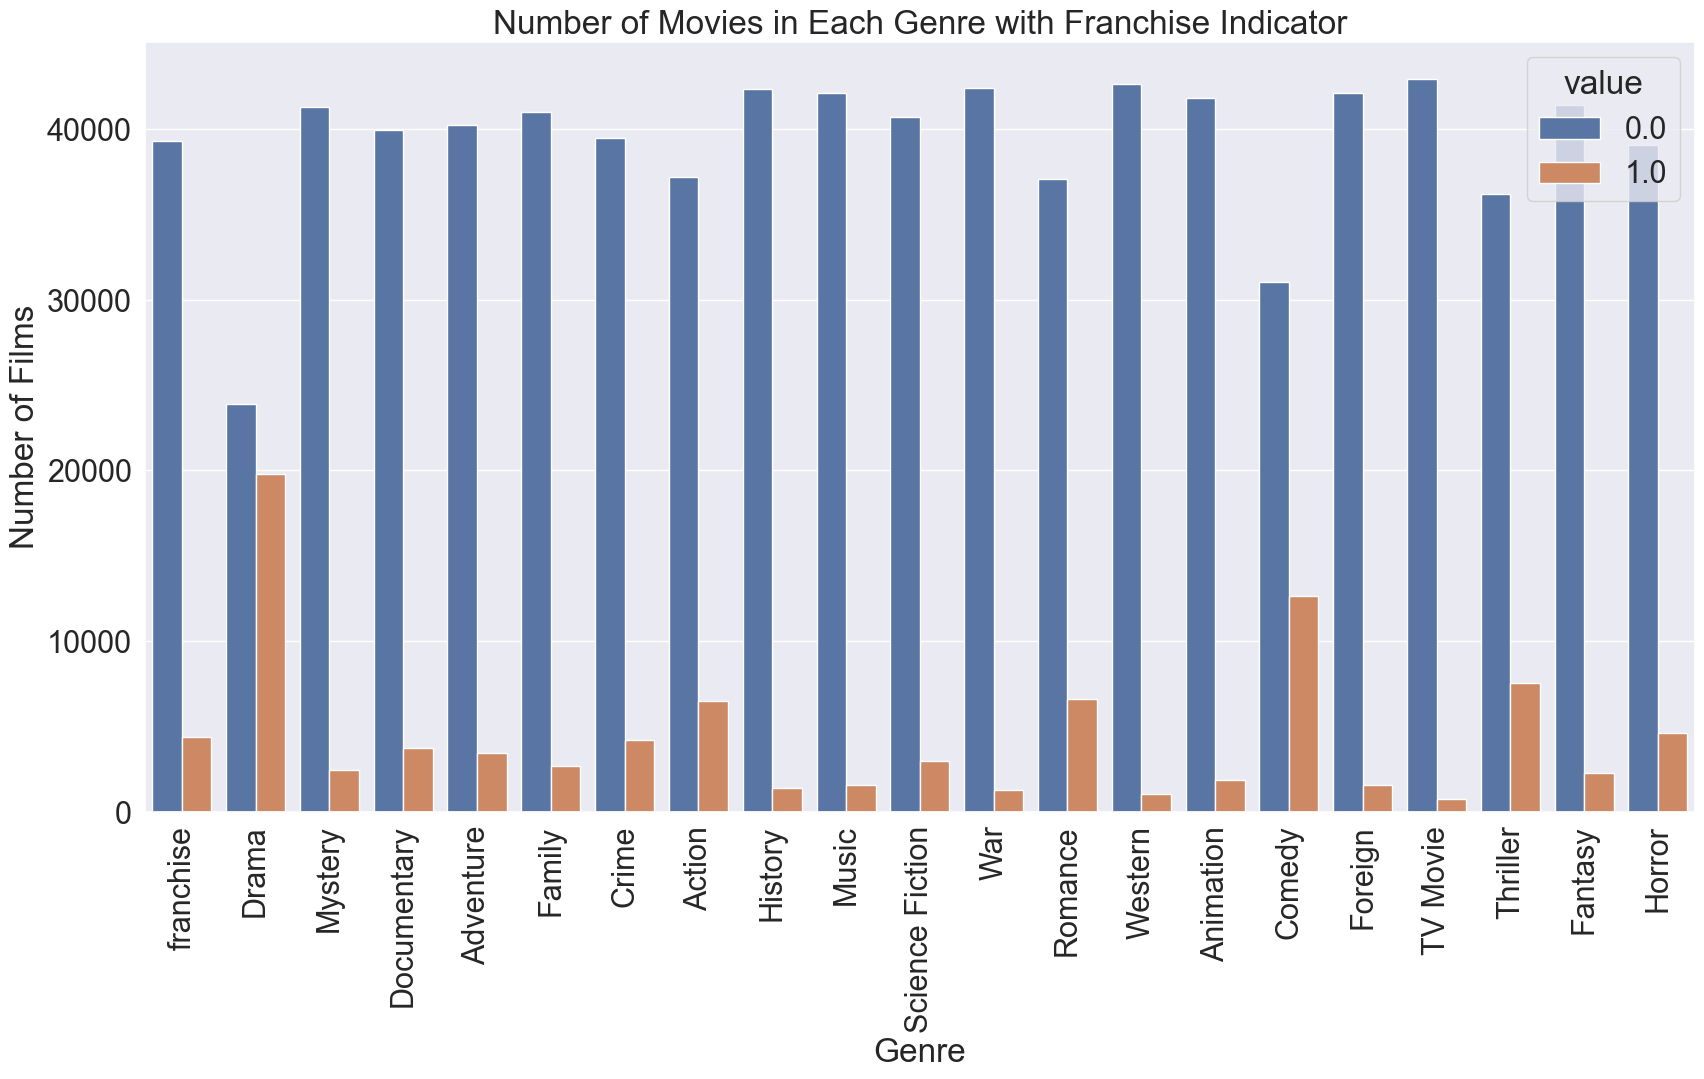

In [65]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2)
ax = sns.countplot(x="variable", hue="value", data=pd.melt(df4[['franchise'] + list(set(all_genres))]))
plt.title('Number of Movies in Each Genre with Franchise Indicator')
plt.xlabel('Genre')
plt.ylabel('Number of Films')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

*Chart No. 3: Heatmap - Correlation Between Genres and Franchise Status*

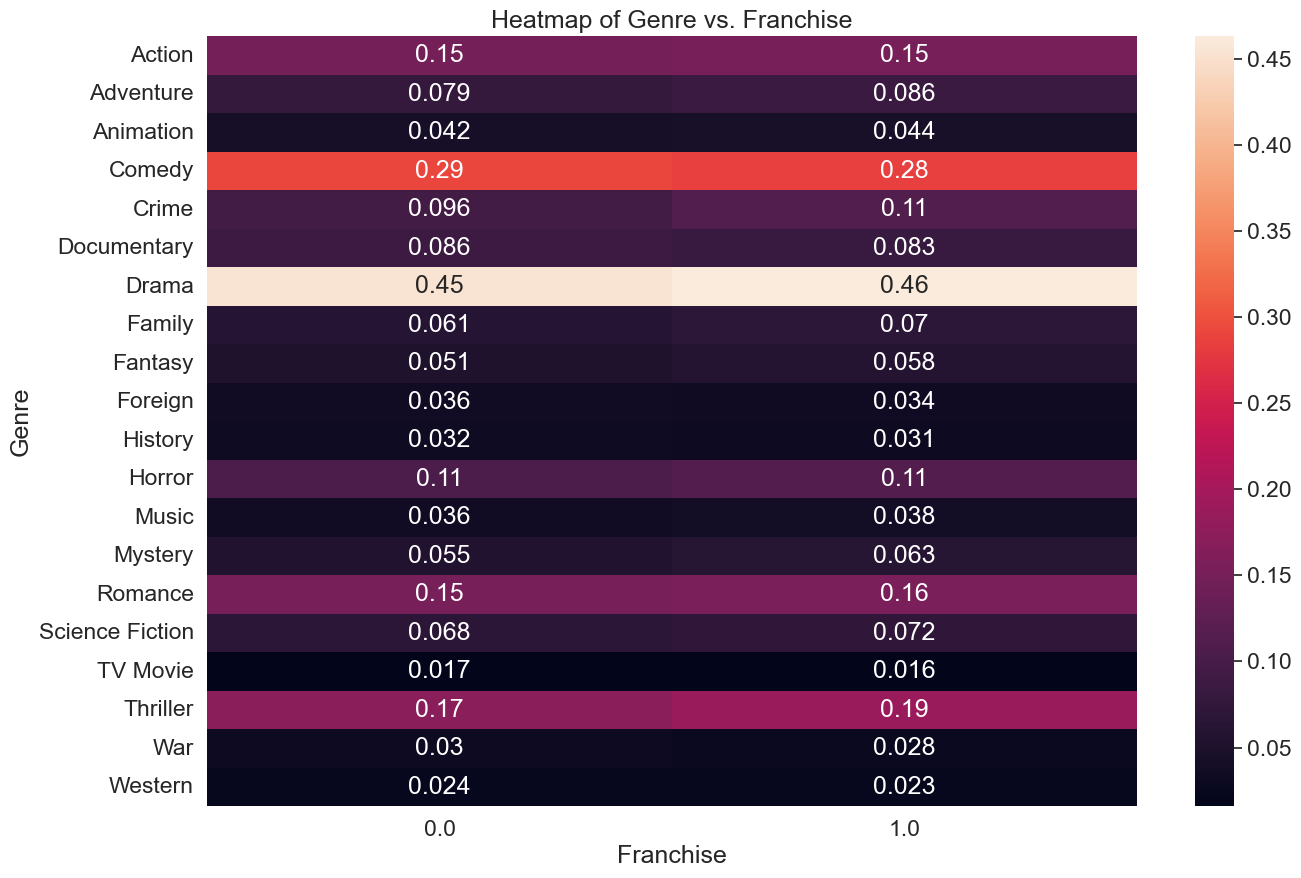

In [66]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
heatmap_data = df4.groupby(['franchise'])[all_genres].mean().T
sns.heatmap(heatmap_data, annot=True)
plt.title('Heatmap of Genre vs. Franchise')
plt.xlabel('Franchise')
plt.ylabel('Genre')
plt.show()